### Doing instance segmentation on petri dish images

In [2]:
import cv2
import skimage
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import os
import random

#### Using the cropping from task 2 to crop the task 3 images  

#### Cropping image 1:

In [3]:
import cv2
import matplotlib.pyplot as plt

def crop_petri_dish(image_path, output_path):
    # Read the image from the given path
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Gaussian blurring to the image to reduce noise and detail
    blurred = cv2.GaussianBlur(image, (9, 9), 0)
    
    # Apply binary thresholding to create a binary image for contour detection
    _, thresh = cv2.threshold(blurred, 10, 255, cv2.THRESH_BINARY)
    
    # Detect all external contours in the binary image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter out contours that are too large (likely not the object of interest)
    contours = [cnt for cnt in contours if cv2.contourArea(cnt) < image.shape[0] * image.shape[1] * 0.95]

    # Find the largest contour assumed to be the target object
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)
    
    # Crop the image to the bounding rectangle of the largest contour
    cropped_image = image[y:y+h, x:x+w]

    # Save the cropped image to the specified output path (make sure to include the file extension)
    cv2.imwrite(output_path, cropped_image)
    return cropped_image

# Correct usage: Pass the path to the image, not the image object
output_path = 'cropped_im1.png'  # Always include the file extension in the output path
image_path = 'task_3_image_1.png'
cropped_image = crop_petri_dish(image_path, output_path)


##### Cropping image 2:

In [4]:
import cv2
import matplotlib.pyplot as plt

def crop_petri_dish(image_path, output_path):
    # Read the image from the given path
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Gaussian blurring to the image to reduce noise and detail
    blurred = cv2.GaussianBlur(image, (9, 9), 0)
    
    # Apply binary thresholding to create a binary image for contour detection
    _, thresh = cv2.threshold(blurred, 10, 255, cv2.THRESH_BINARY)
    
    # Detect all external contours in the binary image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter out contours that are too large (likely not the object of interest)
    contours = [cnt for cnt in contours if cv2.contourArea(cnt) < image.shape[0] * image.shape[1] * 0.95]

    # Find the largest contour assumed to be the target object
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)
    
    # Crop the image to the bounding rectangle of the largest contour
    cropped_image = image[y:y+h, x:x+w]

    # Save the cropped image to the specified output path (make sure to include the file extension)
    cv2.imwrite(output_path, cropped_image)
    return cropped_image

# Correct usage: Pass the path to the image, not the image object
output_path = 'cropped_im2.png'  # Always include the file extension in the output path
image_path = 'task_3_image_2.png'
cropped_image = crop_petri_dish(image_path, output_path)


In [5]:
im1 = cv2.imread('cropped_im1.png', 0)
im2 = cv2.imread('cropped_im2.png', 0)

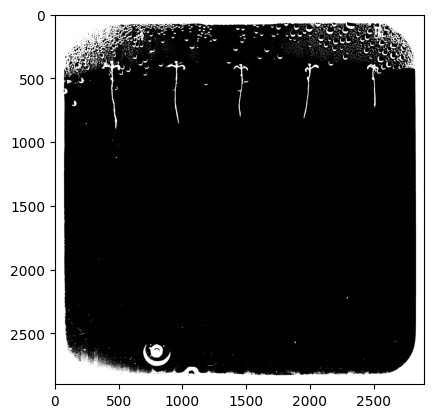

In [6]:
_ , thresh = cv2.threshold(im1, 165, 255, cv2.THRESH_BINARY_INV)

kernel = np.ones((1,1), np.uint8)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

plt.imshow(thresh, cmap='gray')

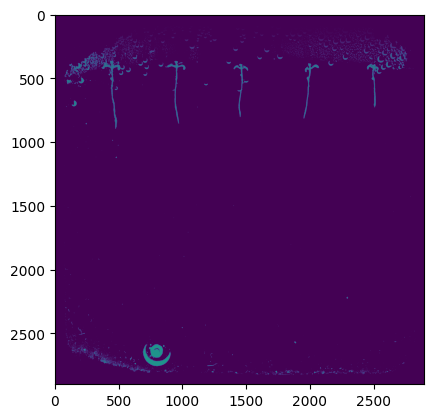

In [7]:
retval, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh)
plt.imshow(labels)

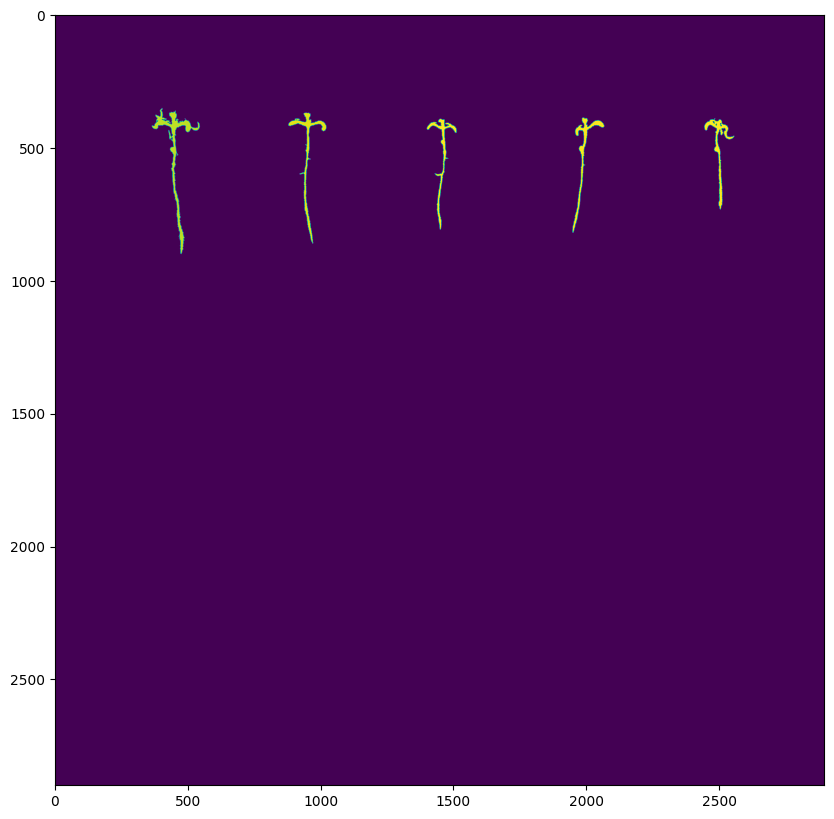

In [8]:
# defining area thresholds
min_area = 4000  # minimum area 
max_area = 20000  # maximum area to ignore
max_height = 2000

# making an empty mask to store the filtered components
filtered_mask = np.zeros_like(thresh, dtype=np.uint8)

# getting the bounding boxes that go around the plants
for i in range(1, retval):  
    x, y, w, h, area = stats[i]
    if min_area <= area <= max_area and y + h <= max_height:
        # adding the component to the mask
        filtered_mask[y:y+h, x:x+w] = thresh[y:y+h, x:x+w]

# mapping colors to the components
colored_labels = np.zeros_like(labels, dtype=np.int32)

for i in range(1, retval):  # skipping the background
    if min_area <= stats[i, 4] <= max_area  and stats[i, 1] + stats[i, 3] <= max_height:  # diltering by area
        colored_labels[labels == i] = i  # assigning a unique label

# applying a color map using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(colored_labels, cmap='viridis')

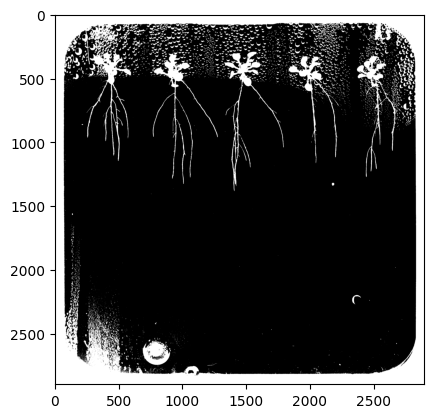

In [9]:
_ , thresh = cv2.threshold(im2, 165, 255, cv2.THRESH_BINARY_INV)

kernel = np.ones((1,1), np.uint8)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

plt.imshow(thresh, cmap='gray')

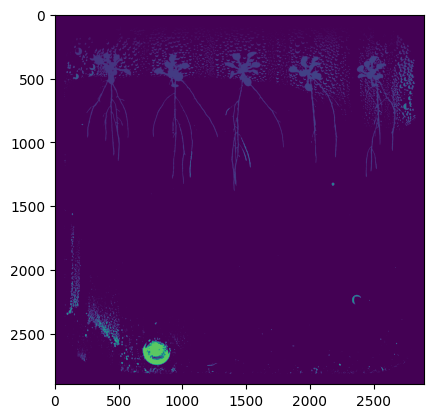

In [10]:
retval, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh)
plt.imshow(labels)

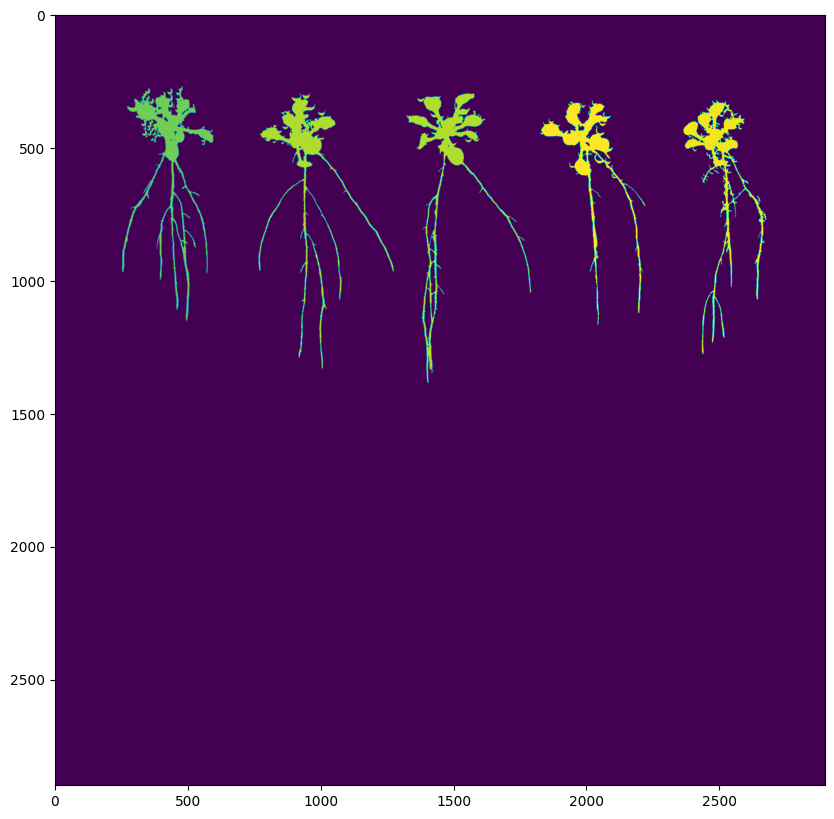

In [11]:
# defining area thresholds
min_area = 30000  # minimum area 
max_area = 800000  # maximum area to ignore

# making an empty mask to store the filtered components
filtered_mask = np.zeros_like(thresh, dtype=np.uint8)

# getting the bounding boxes that go around the plants
for i in range(1, retval):  
    x, y, w, h, area = stats[i]
    if min_area <= area <= max_area:
        # adding the component to the mask
        filtered_mask[y:y+h, x:x+w] = thresh[y:y+h, x:x+w]

# mapping colors to the components
colored_labels = np.zeros_like(labels, dtype=np.int32)

for i in range(1, retval):  # skipping the background
    if min_area <= stats[i, 4] <= max_area:  # diltering by area
        colored_labels[labels == i] = i  # assigning a unique label

# applying a color map using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(colored_labels, cmap='viridis')